# Twitter Sentiment: Climate Change Belief Analysis
## GROUP 3
### Advanced Classification Predict

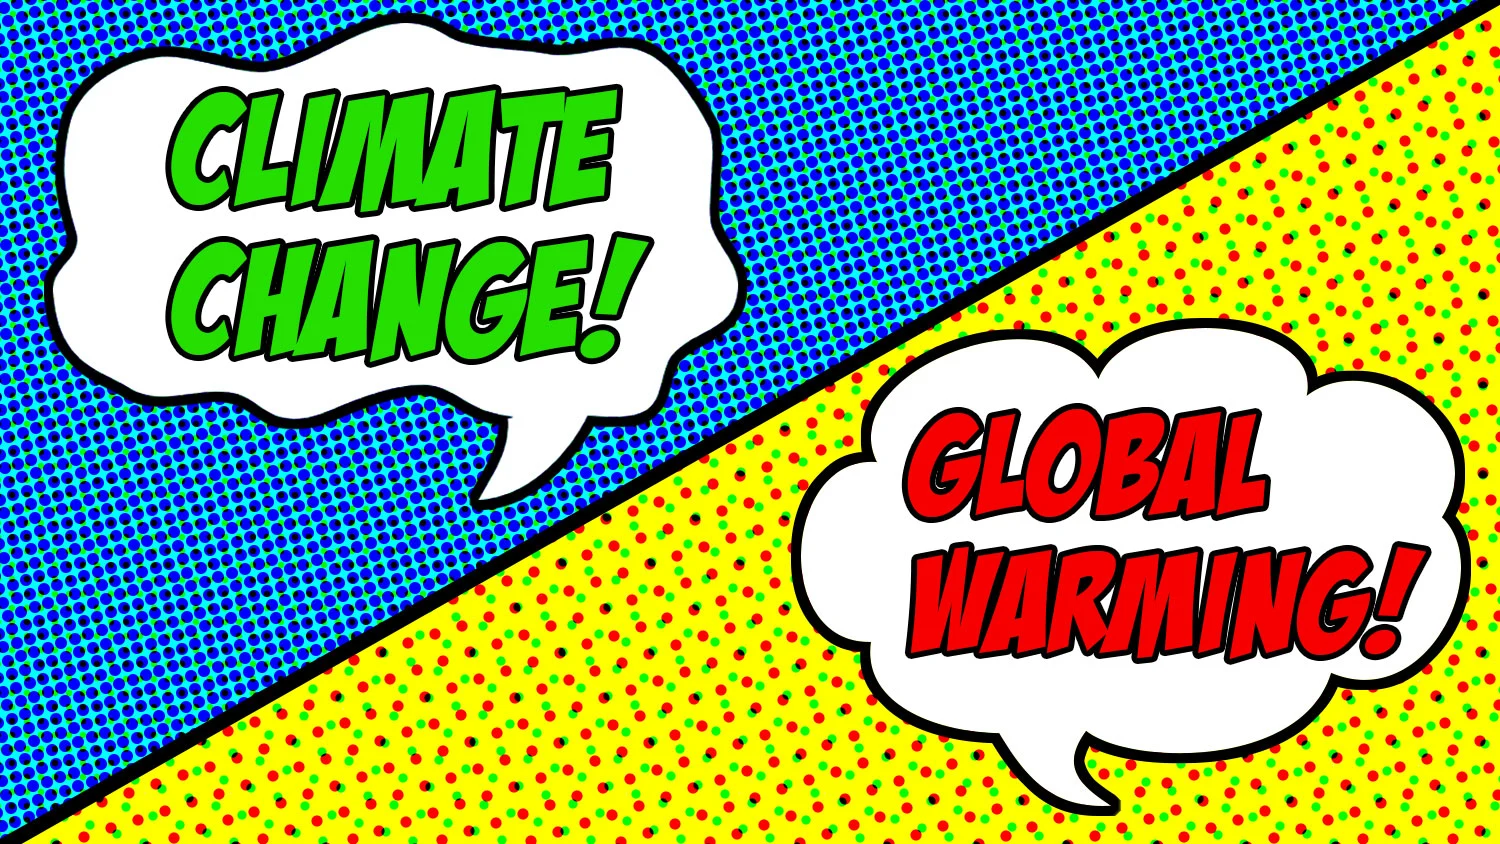


# Introduction 
Several companies are built around lessening one’s environmental impact or carbon footprint. This is because they offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, we have created a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. This model together will the accompanying app will help Geo-Environmental Consultation companies who are turning to social media to obtain valuable information about job applicants and to monitor the activities of their employees in relation to the values they have towards the company's projects and beliefs surrounding the ever changing global environment.

Providing an accurate and robust solution to this task will provide access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies. The app launched on **streamlit** is also an intuitive, easy to use, simple and the customer can rely on the product it.

## Table of Contents

1. Intro to Comet
2. Importing Libraries
3. Importing Dataset
4. Data Preprocessing
5. Exploratory Data Analysis
6. Modelling
7. Submission
8. Conclusion

## 1. Comet 

Comet is a a tool used for model versioning and experimentation as it records the parameters and conditions from each conducted experiements. Comet allows for reproducing of results, and/or going back to a previous version of the experiment.

In [1]:
# Loading in the comet_ml tool
import comet_ml
from comet_ml import Experiment
    
# Setting the API key, saved as environment variable 
experiment = Experiment(api_key="1DpubPFI6szNQR3Dou0CiLiDC",
        project_name="general", workspace="drikus-d")
experiment.display()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/drikus-d/general/144ba6d3a5df48e0bc90909a95e932ce



# 2. Loading Libraries
All Python capabilities are not loaded into our working environment by default (even those that are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are the most commonly used libraries. Numpy is required for calculations like mean, median, square roots, etc. Pandas is used for data processing and data frames. We choose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

Note: You can import all the libraries that you think will be required or can import it as you go along. 

Here we are importing two libraries - numpy and pandas


In [ ]:
# Only excecute this once to load comet into your enviroment
#!pip install comet_ml

In [2]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool

import requests
import io

# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import time
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

# Quality of all figures in notebook
mpl.rcParams['figure.dpi'] = 180

# NLP Libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer
from sklearn.datasets import make_classification
from imblearn.under_sampling import InstanceHardnessThreshold

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# 3. Loading Dataset
Pandas module used for inporting dataset 
<br>In read_csv() function, we have passed the location to where the files are located in the dphi official github page

In [3]:
# In read_csv() function, we have passed the location to where the files are located in the dphi official github page.
url = "https://github.com/drikus-d/classification-predict-streamlit-template/blob/master/resources/train.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
train_data = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
print (train_data.head())

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954


# 4. Data Preprocessing

## Basic EDA: Summary Statistics

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


From the above it's clear that we don't have missing values, with 15819 rows of data, with 3 columns. 
<br>**Sentiment** and **tweetID** are integers 
<br>**message** (the tweet) is an object (String type) 

In [5]:
# Shape of the dataset
train_data.shape

(15819, 3)

In [6]:
# Looking at the numbers of possible classes in our sentiment
train_data['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

The tweets sentiments are divided into four (4) classes:

*  [ 2 ] - News: tweets links to factual news about climate change
*  [ 1 ] - Pro: tweets that supports the belief of man-made climate change
*  [ 0 ] - Neutral: tweets that neither support nor refutes the belief of man-made climate change
*  [-1 ] - Anti (Negative): tweets that does not believe in man-made climate change

In [7]:
# Looking at the how the messages are distributed across the sentiment
train_data.describe()

sentiment        tweetid
count  15819.000000   15819.000000
mean       0.917504  501719.433656
std        0.836537  289045.983132
min       -1.000000       6.000000
25%        1.000000  253207.500000
50%        1.000000  502291.000000
75%        1.000000  753769.000000
max        2.000000  999888.000000

## Missing values

In [8]:
# Checking for missing values
train_data.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Fortunately, there are no missing values in our dataset.

In [9]:
# Checking whether a character is white-space character or not
print(len(train_data['message']))
print(sum(train_data['message'].apply(lambda x: x.isspace())))

15819
0


In [10]:
# Sample tweet
tweet = train_data.iloc[4,1]
print(tweet)

RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight


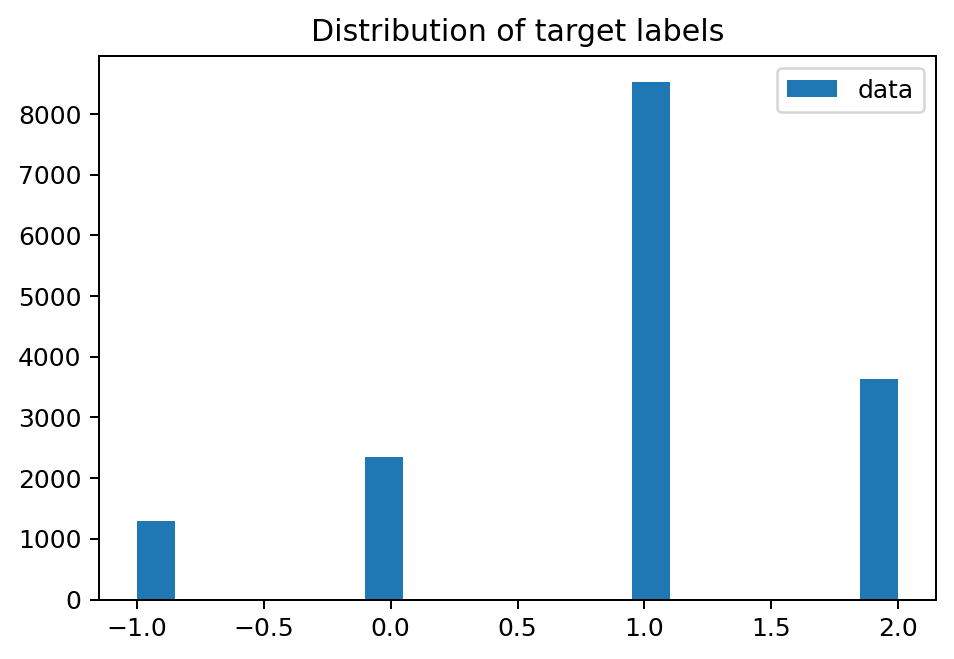

In [11]:
# Visualizing the distribution of the target 
plt.hist(train_data['sentiment'], label='data', bins=20);
plt.legend();
plt.title('Distribution of target labels')
plt.show()

An imbalance of classes occurs in the in the dataset. There is a lot more ofthe '1' sentiment relative to the rest. This disproportionate ratio of observations in each class is common in mascine learning. This can cause problems as most algorithms are designed to maximize accuracy and reduce error. Therefore we will address and take care of the class imbalance in our EDA

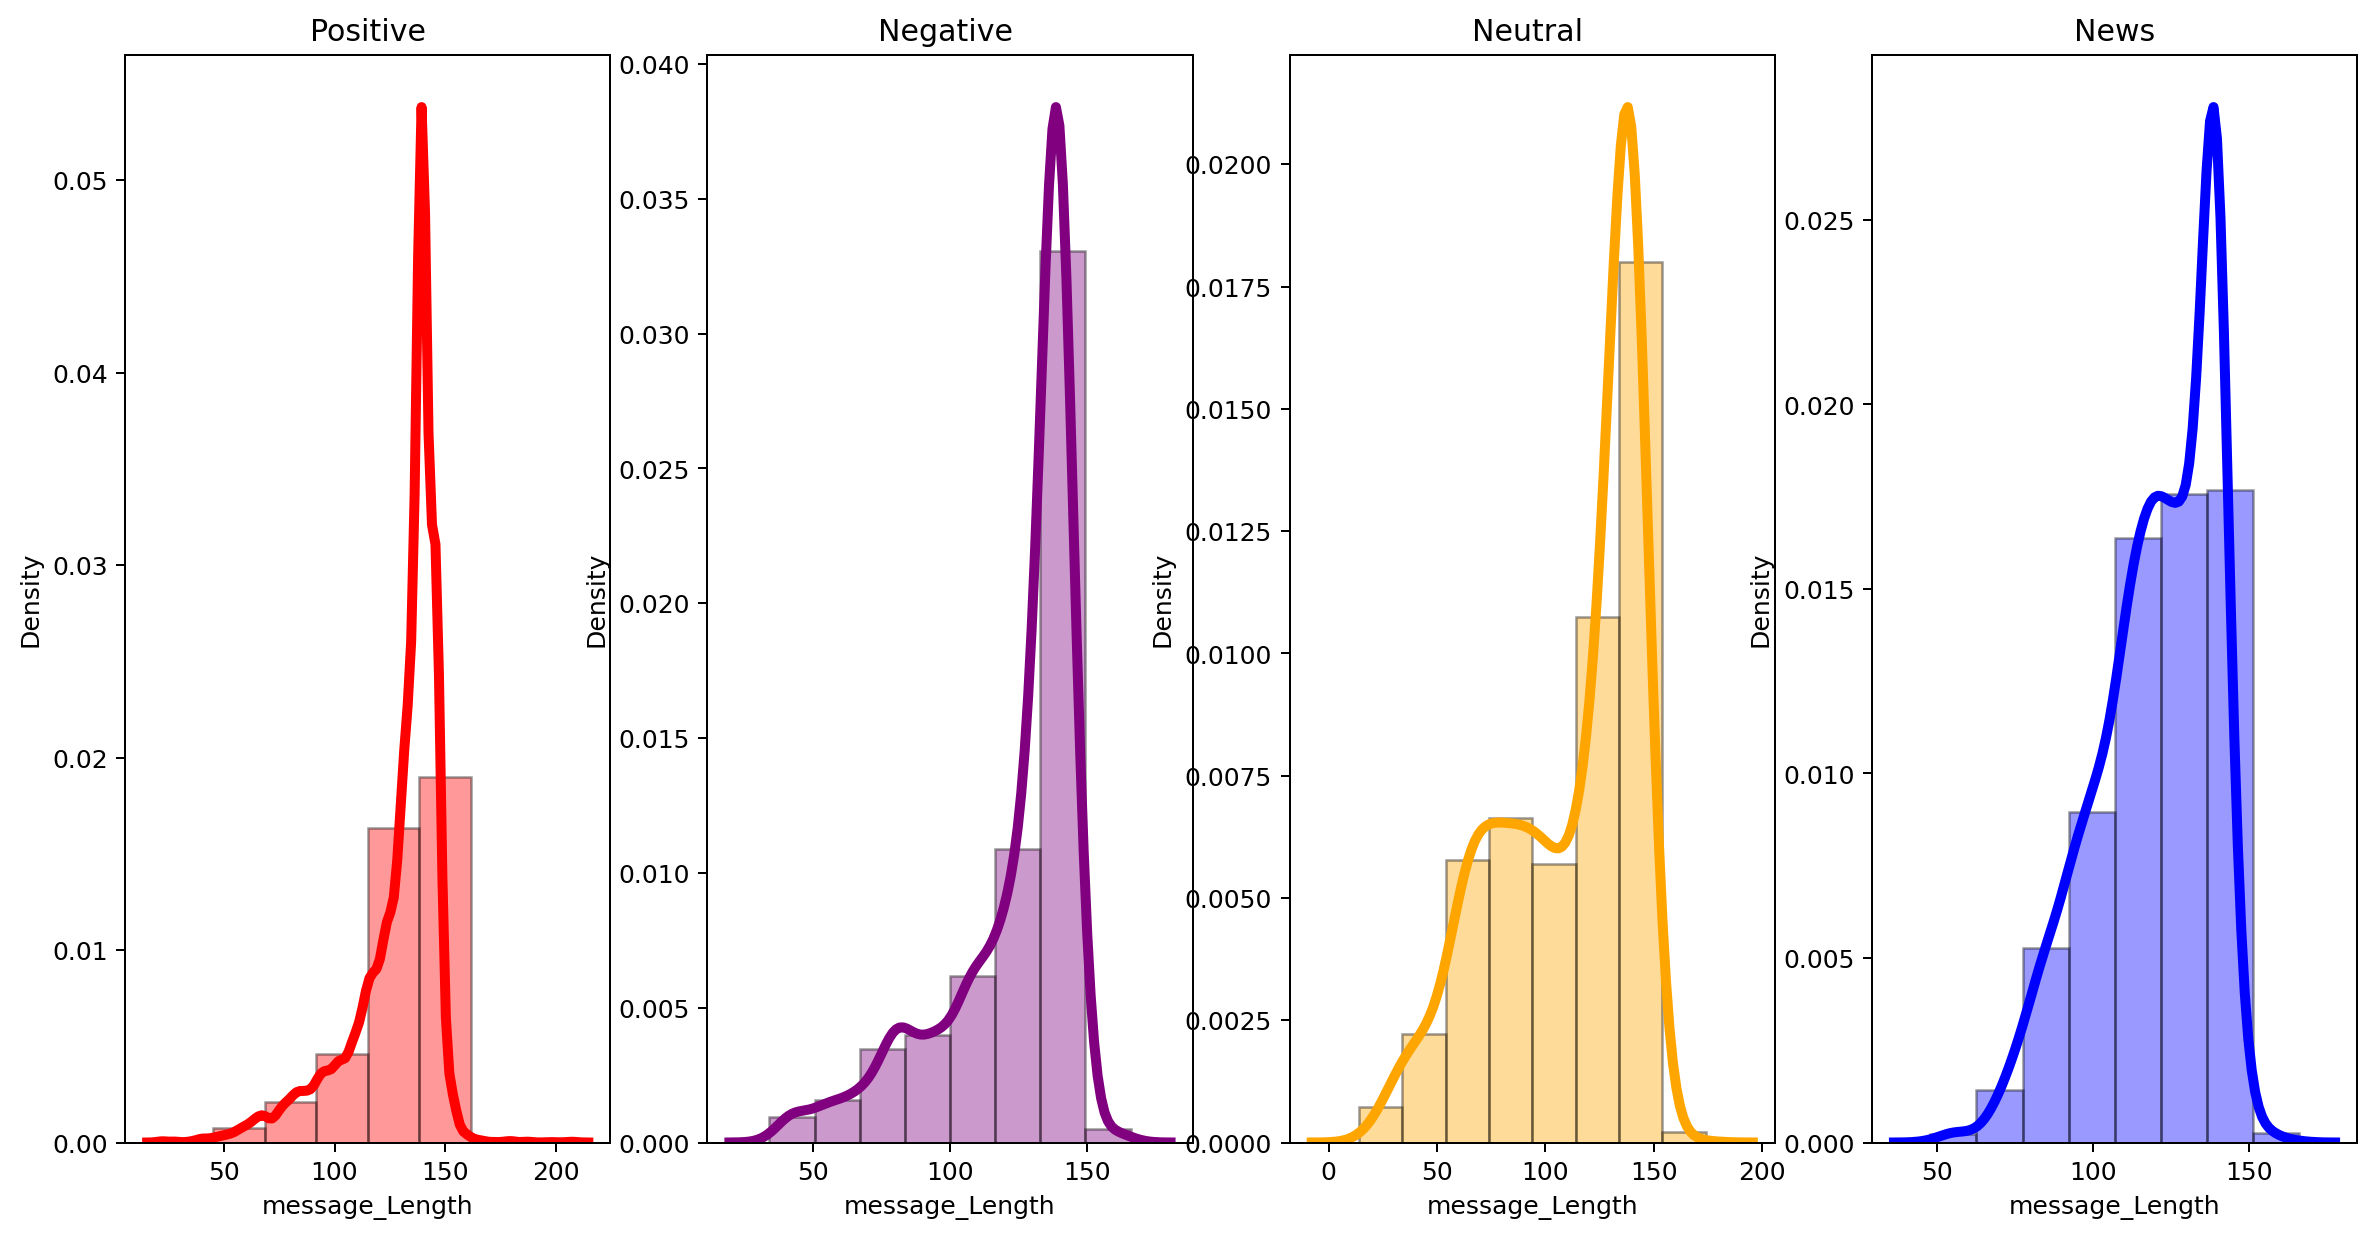

In [12]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))
#For Positive 
sns.distplot(train_data[train_data['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'red', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train_data[train_data['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train_data[train_data['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'orange',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For News
sns.distplot(train_data[train_data['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

#plt.title('Distribution of target labels')
plt.show()

The average length of messages for all sentiments is not suprising as a tweet is only limited to 140 characters. <br>Density contrast between positive and negative sentiments is interesting - poisitive tweets seem to be shorter. 
Now that we have explored our dataset, we can begin perfoming some analyses on it.

# 5. Exploratory Data Analysis

## 5.1 Data Visualisation

In [13]:
#Making copy of train dataset
working_df = train_data.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]

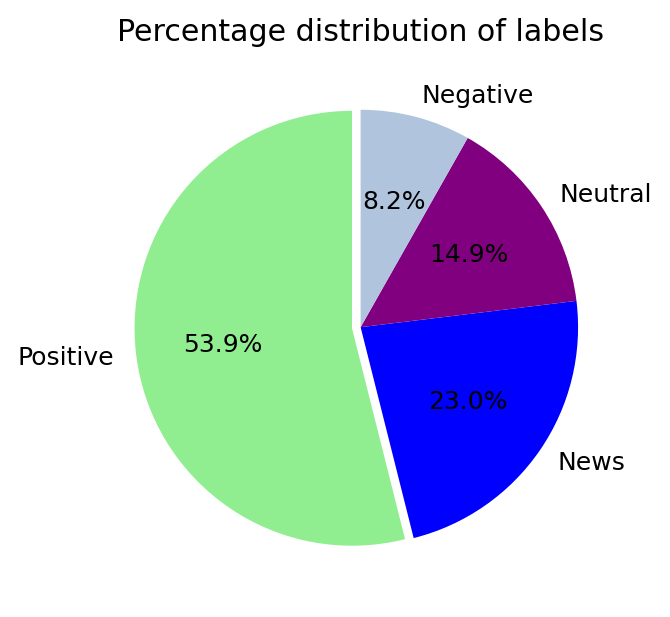

In [14]:
# checking the numerical distribution
values = working_df['sentiment'].value_counts()/working_df.shape[0]
labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.title('Percentage distribution of labels')
plt.show()

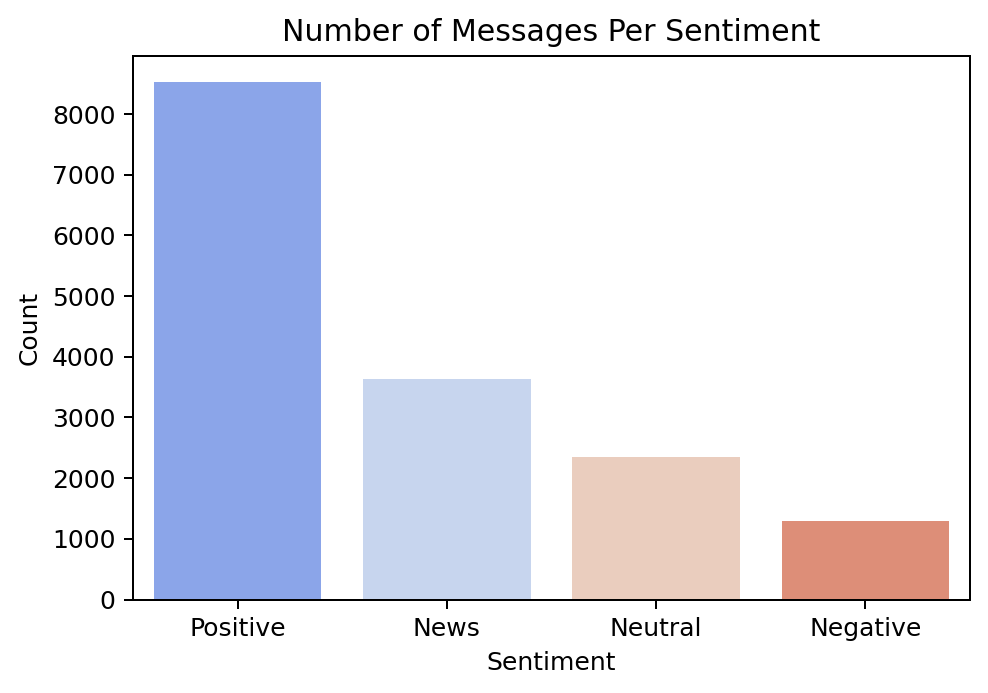

In [15]:
sns.countplot(x='sentiment' ,data = working_df, palette='coolwarm')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Messages Per Sentiment')
plt.show()

As we noted earlier, there is an imbalance of classes in the dataset, with:
* positive tweets on climate change having the most number of tweets at 53.9% of our dataset. 
* tweets against climate change having the least number of counts (8.2%). 

As such this can lead to a disproportionate ratio of observations in each class, causing problems as most algorithms are designed to maximize accuracy and reduce error. We therefore continue to analyse and evaluate for more insights to be derived from the dataset as we prepared to balance later on in the analysis.

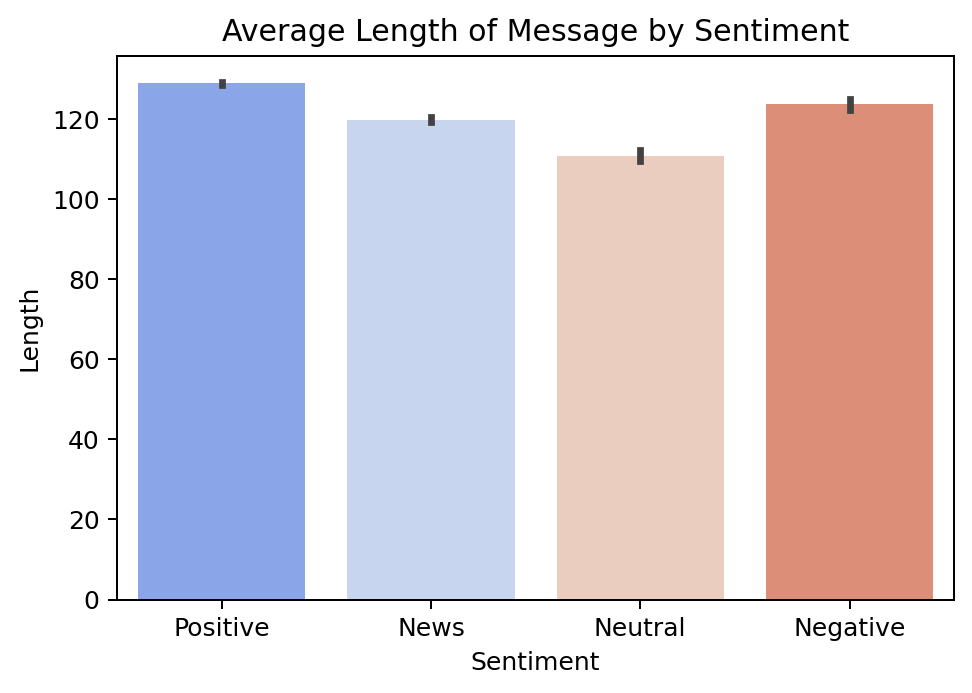

In [16]:
# Visualizing text lengths for each sentiment
sns.barplot(x='sentiment', y=working_df['message'].apply(len) ,data = working_df, palette='coolwarm')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

The average text length of tweets is rather about equal with each sentiment. 

In [17]:
# Extracting Users in a column
working_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in working_df.message]

# Creating a column of hastags
working_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in working_df.message]

In [18]:
# Generating Counts of users
counts = working_df[['message',
                     'users']].groupby('users',
                                       as_index=False).count().sort_values(by='message', ascending=False)

In [19]:
# Top 5 most popular
counts.head()

users  message
3410  @StephenSchlegel      307
3270       @SenSanders      243
6182  @realDonaldTrump      143
448     @BernieSanders      121
612               @CNN      106

#### Shocker: Donald trump tweets about climate change a lot 
Stephen Schlegel had the most number of tweets.
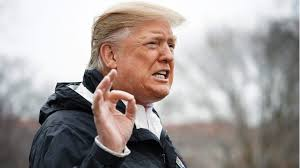

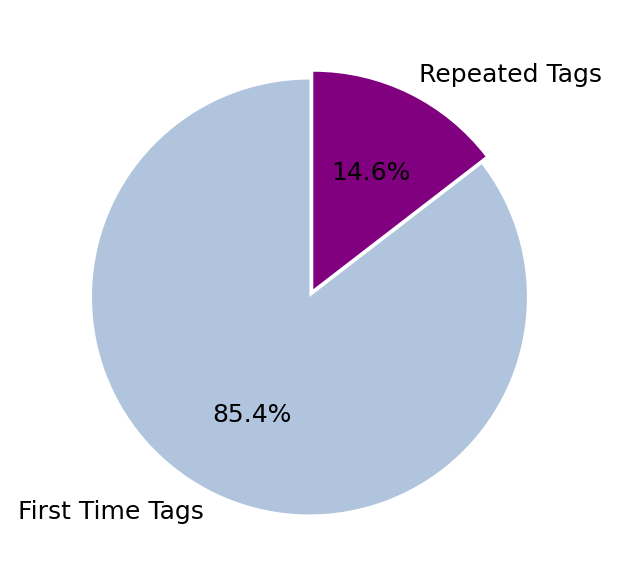

In [20]:
# checking the numerical distribution
values = [sum(np.array(counts['message']) == 1)/len(counts['message']),
          sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['lightsteelblue', "purple"]
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0), colors=colors)
plt.show()

In [21]:
repeated_tags_rate = round(sum(np.array(counts['message']) > 1)*100/len(counts['message']), 1)
print(f"{repeated_tags_rate} percent of the data are from repeated tags")

14.6 percent of the data are from repeated tags


In [22]:
first_time_tags = round(sum(np.array(counts['message']) == 1)*100/len(counts['message']), 1)
print(f"{first_time_tags} percent of the data are from first time tags")

85.4 percent of the data are from first time tags


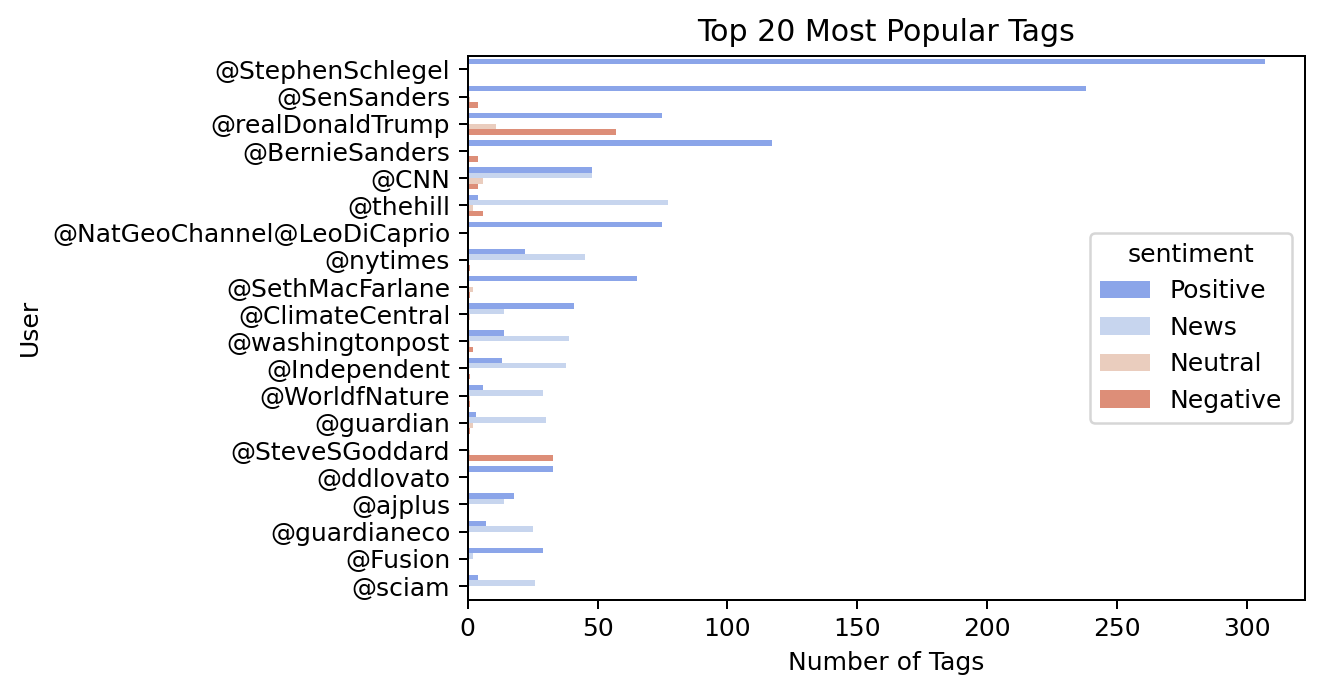

In [23]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", hue="sentiment", data=working_df, palette='coolwarm',
              order=working_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()

#### Now that we have had a look at the tweets themselves as well as the users, we now analyse the hastags:

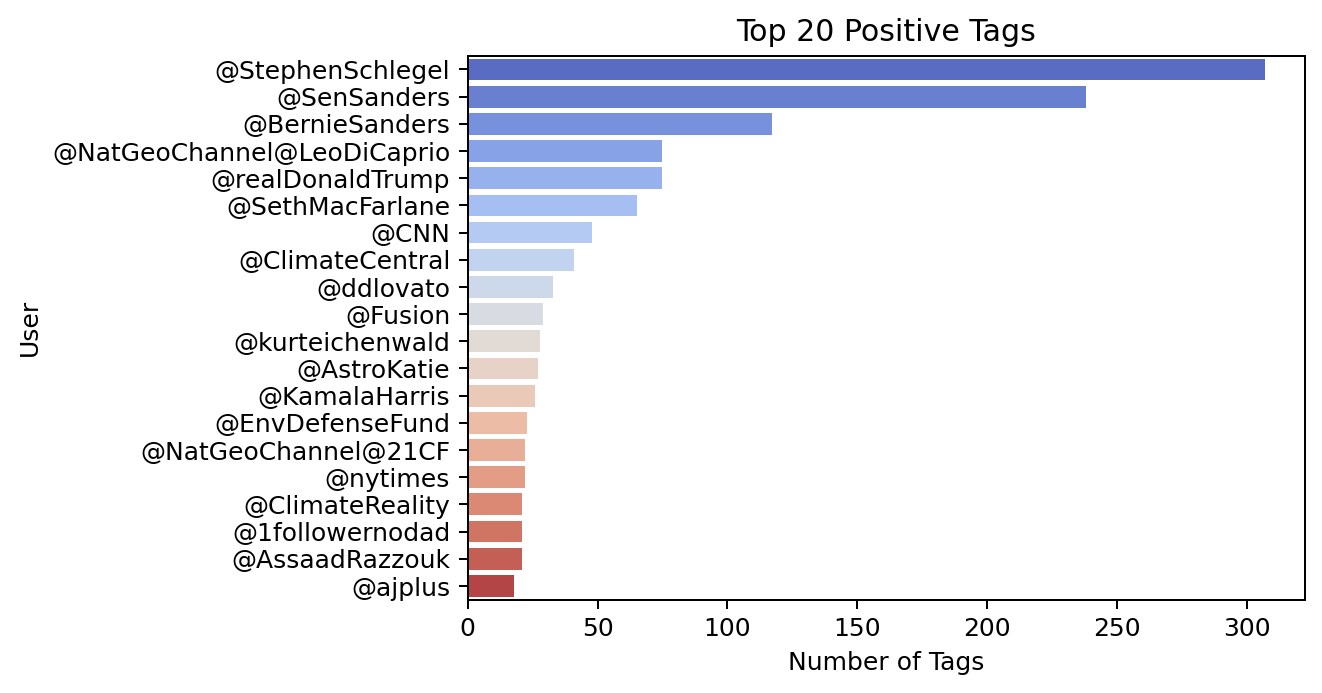

In [24]:
# Analysis of most popular tags, sorted by popularity
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Positive'],
              order=working_df[working_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Positive Tags')
plt.show()

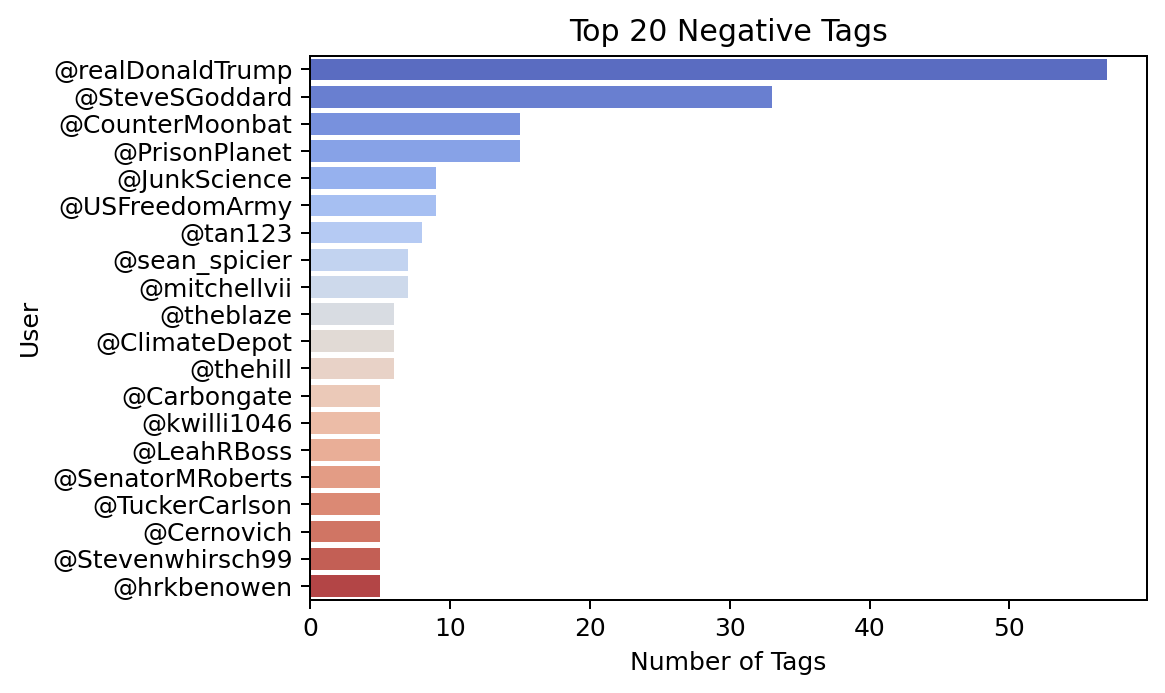

In [25]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Negative'],
              order=working_df[working_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Negative Tags')
plt.show()

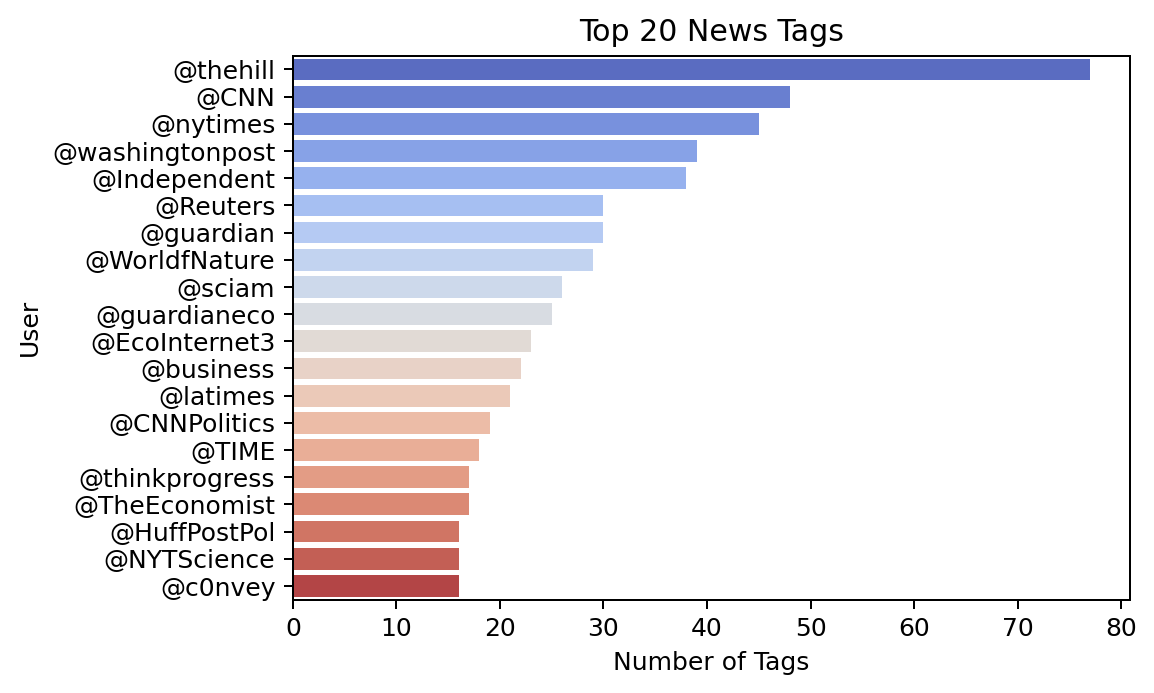

In [26]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'News'],
              order=working_df[working_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.show()

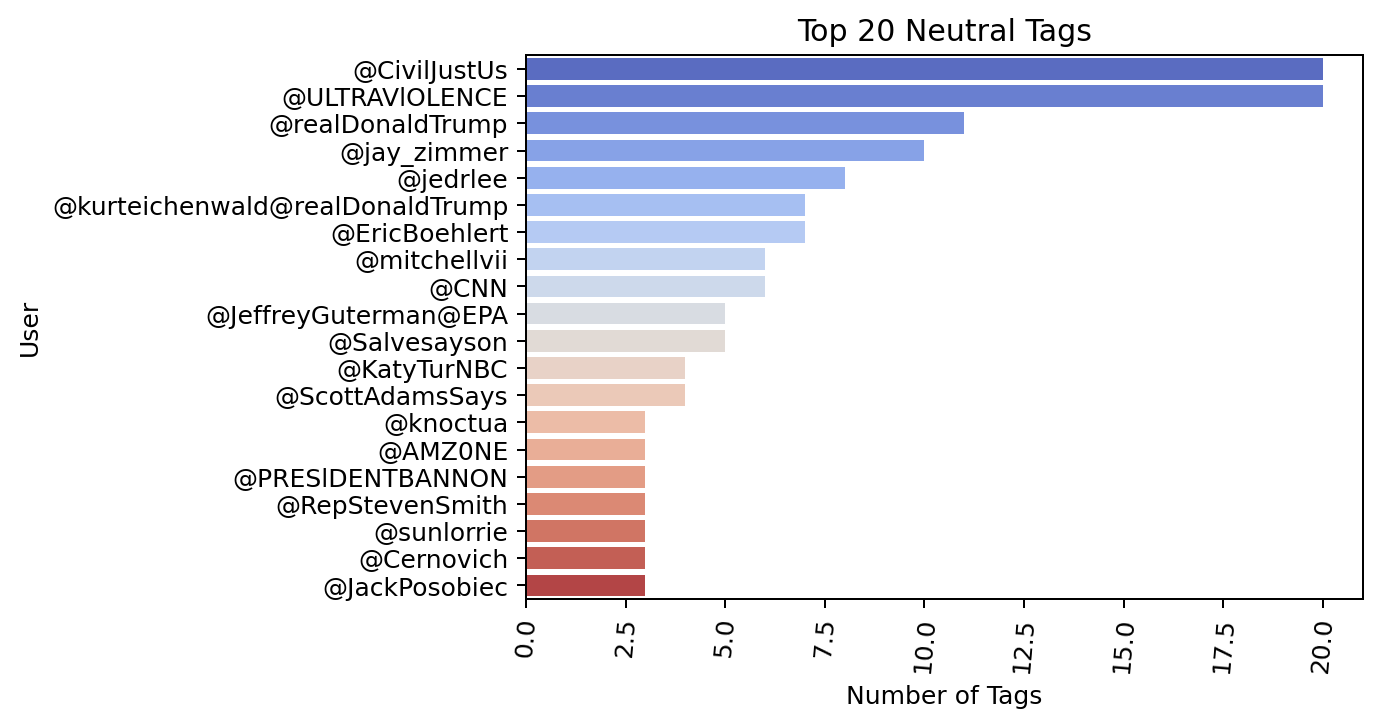

In [27]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", data=working_df[working_df['sentiment'] == 'Neutral'],
              order=working_df[working_df['sentiment'] == 'Neutral'].users.value_counts().iloc[:20].index,palette='coolwarm') 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Neutral Tags')
plt.xticks(rotation=85)
plt.show()

Comments:
* We can notice from the graphs that Stephen Schlegel had the most number of tags and of positive tags, with reagrd to climate change.
* The most number of negative tags were from Donald Trump, at over 50 tags.
* The most number of news tags were from The Hill news, at over 70 tags.
* Ultra Violence had the most number of neutral tags of over 19 tags. 
* Donald Trump was the user that appeared in almost all the sentiments, with his username appearing in positive tags(over 50 tags), negative tags(over 50 tags) and neutral tags(over 10 tags).

**Top 30 used words in the tweets**

Text(0.5, 1.0, 'Train : Most Frequently Occuring Words - Top 30')

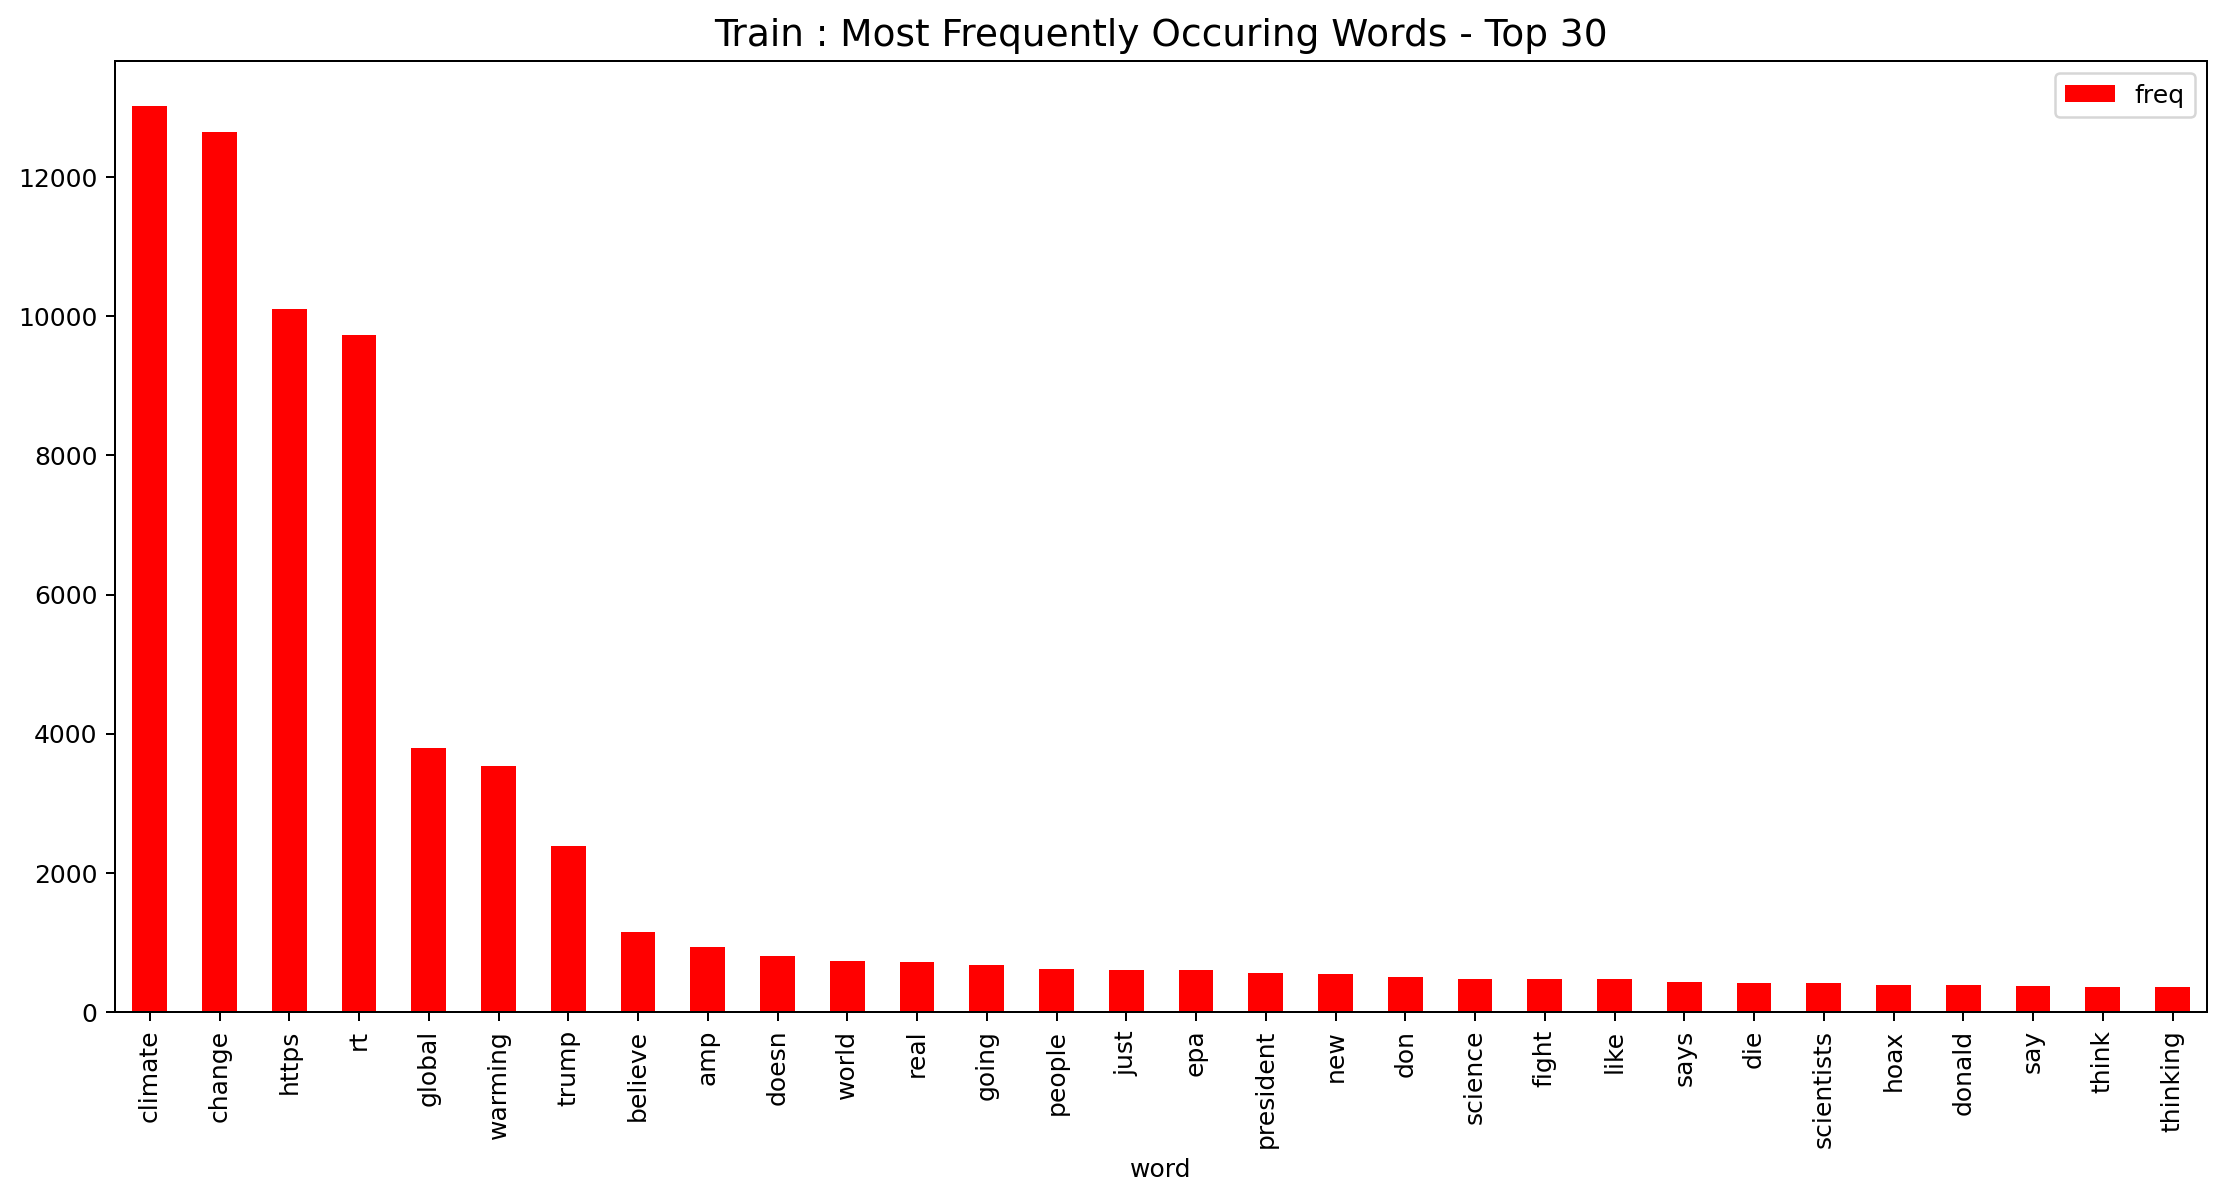

In [28]:
#convert the test to numerical values 
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_data.message)

sum_words = words.sum(axis=0)
#create a frequency of most occuring words
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create a dataframe of the words and frequency 
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.title("Train : Most Frequently Occuring Words - Top 30",size=15)

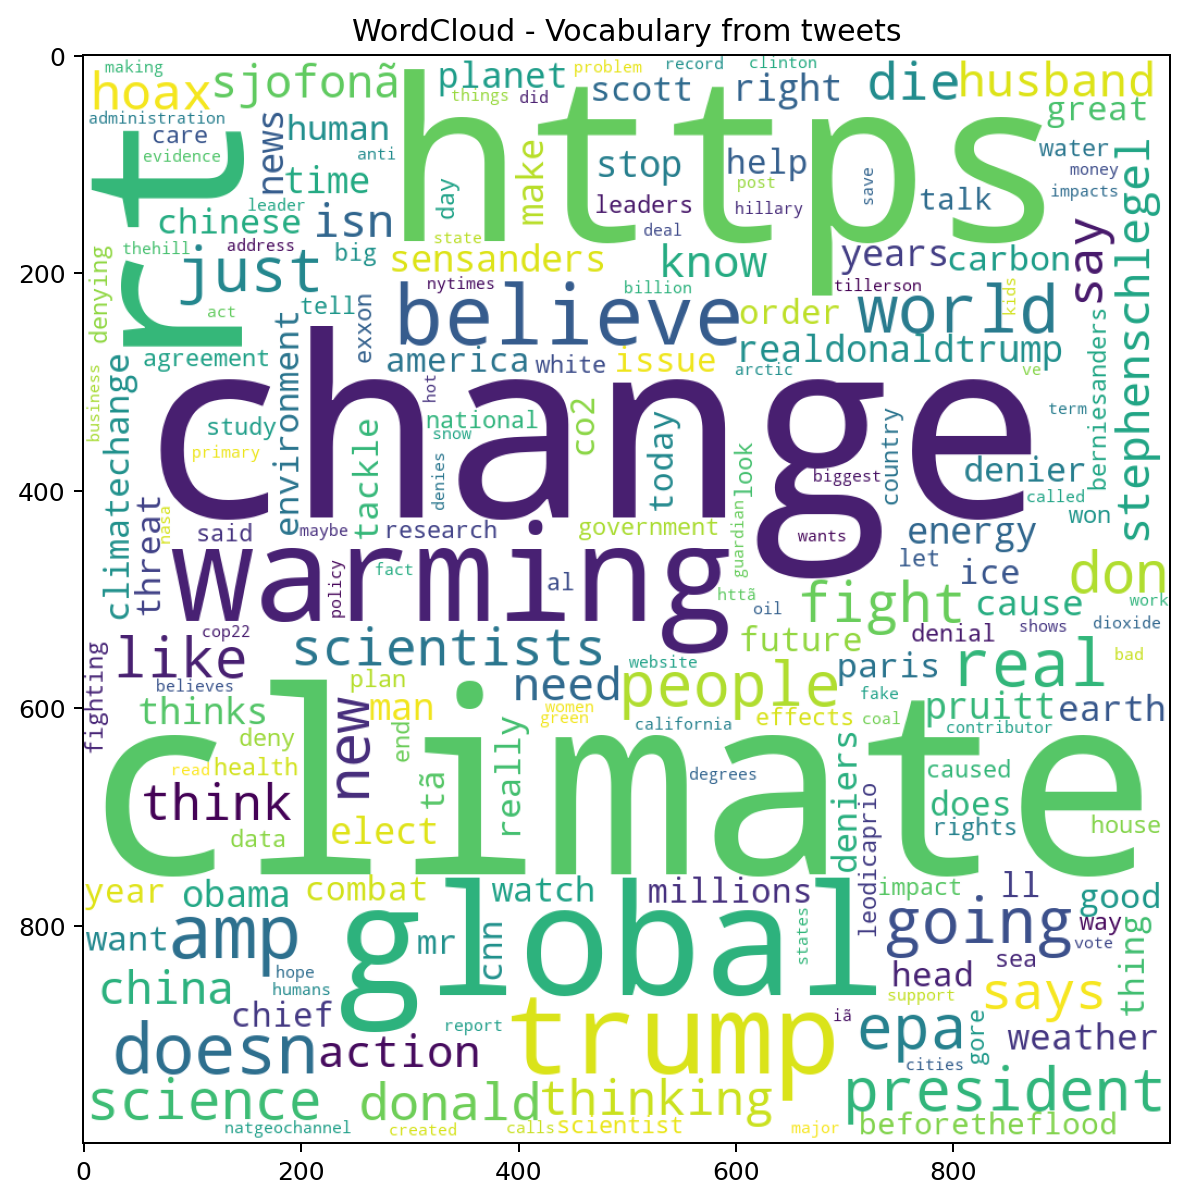

In [29]:
#creating a word cloud from the data
wordcloud = WordCloud(background_color = 'white', 
                      width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(8,8))
plt.title("WordCloud - Vocabulary from tweets")
plt.imshow(wordcloud)

## 5.2. Data Cleaning

Cleaning is the process of detecting and correcting corrupt or inaccurate records from the dataset and identifying incomplete, incorrect, inaccurate or irrelevant parts of the data. We also apply database normalization which is the process of structuring a relational database in accordance with a series of normal forms in order to reduce data redundancy. Applying it will aslo help improve data integrity as it entails organizing the attributes of a dataset to ensure that their dependencies are properly enforced by database integrity constraints. Stemming and Lemmatization are techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.

The following function is an important step in the data mining process. In our case of classification, preprocessing data means; Data cleaning, Fill in missing values, smoothing noisy data and resolving any existing inconsistencies. Success in the steps will then make it possible and some-what easy for us to perform Data integration, Data transformation, Normalization and aggregation as well as Data reduction.

In [38]:
from sklearn.utils import resample

def resampling(df):
    """
        The functions takes in dataframe and resample the classses base on class size.
        The class size is a average of the datasets among the classes.
        This function resamples by downsampling classes with observations greater than the class size and
        upsampling the classes with observations smaller than the class size.
    """
    df = train_data.copy()
    class_2 = df[df['sentiment'] == 2]  
    class_1 = df[df['sentiment'] == 1]  
    class_0 = df[df['sentiment'] == 0]  
    class_n1 = df[df['sentiment'] == -1] 
    class_size = int((len(class_1)+len(class_2)+len(class_0)+len(class_n1))/4)
    # Downsampling class_1 the PRO class
    rclass_1 = resample(class_1, replace=True, n_samples=class_size, random_state=42)
    #upsampling class 2 the NEWS class
    rclass_2 = resample(class_2, replace=True, n_samples=class_size, random_state=42)
    #upsampling class 0 NUETRAL class
    rclass_0 = resample(class_0, replace=True, n_samples=class_size, random_state=42)
    #upsampling class -1 the ANTI class
    rclass_n1 = resample(class_n1, replace=True, n_samples=class_size, random_state=42)
    sampled_df = pd.concat([rclass_2, rclass_1, rclass_0, rclass_n1])
    
    return sampled_df
    rclass_1 = resample(class_1, replace=True, n_samples=class_size, random_state=42)
    #upsampling class 2 the NEWS class
    rclass_2 = resample(class_2, replace=True, n_samples=class_size, random_state=42)
    #upsampling class 0 NUETRAL class
    rclass_0 = resample(class_0, replace=True, n_samples=class_size, random_state=42)
    #upsampling class -1 the ANTI class
    rclass_n1 = resample(class_n1, replace=True, n_samples=class_size, random_state=42)
    sampled_df = pd.concat([rclass_2, rclass_1, rclass_0, rclass_n1])
    
    return sampled_df

In [39]:
Resampled_train_df = resampling(train_data)

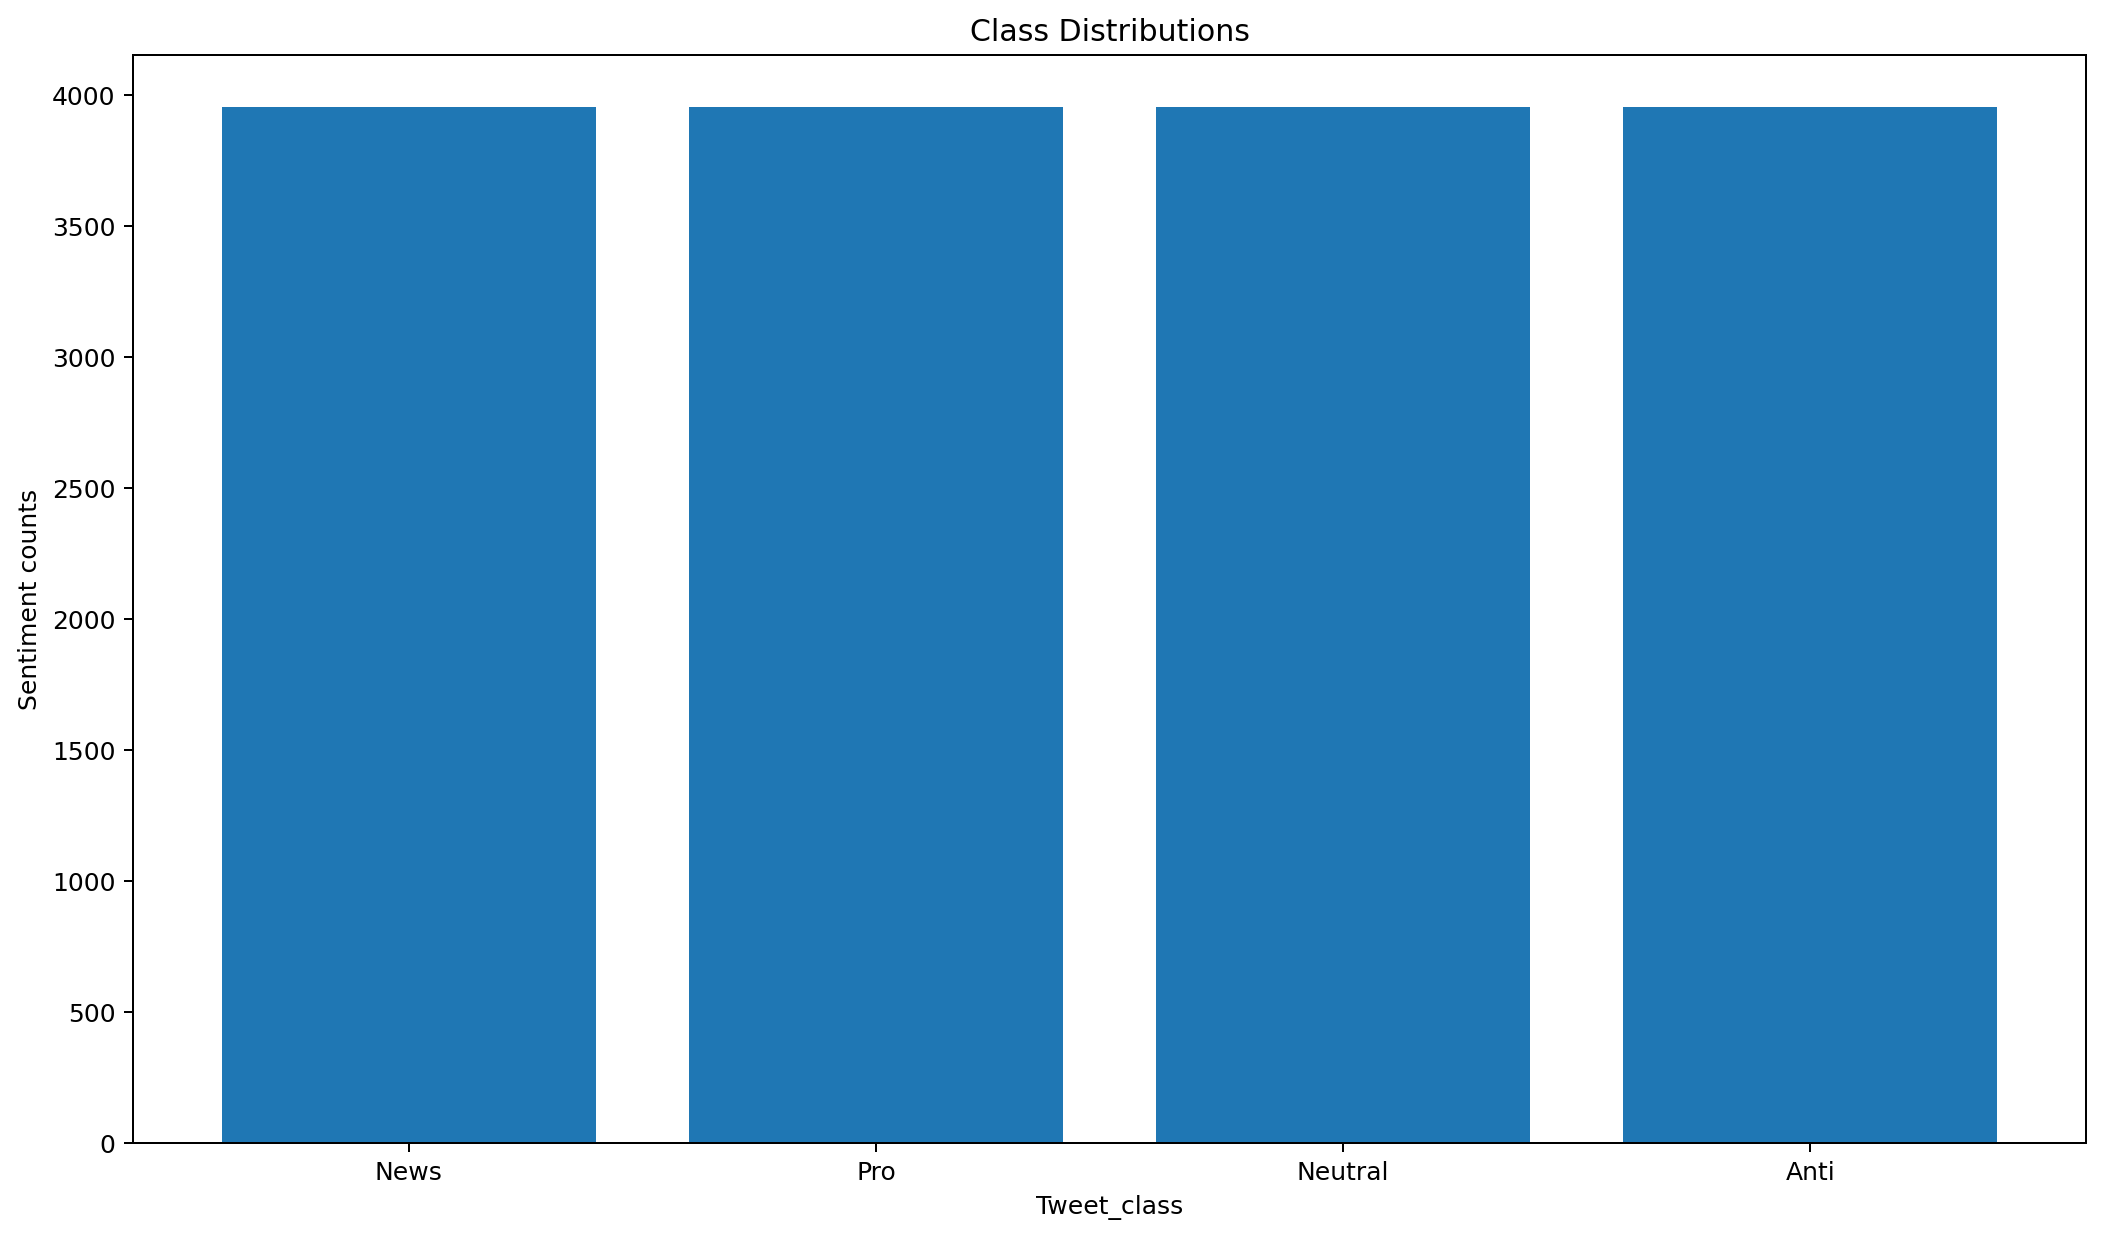

In [41]:
news=Resampled_train_df[Resampled_train_df.sentiment == 2].shape[0]
pro =Resampled_train_df[Resampled_train_df.sentiment == 1].shape[0]
neutral=Resampled_train_df[Resampled_train_df.sentiment == 0].shape[0]
anti =Resampled_train_df[Resampled_train_df.sentiment == -1].shape[0]
#visualising
plt.figure(1,figsize=(14,8))
plt.bar(["News", "Pro", "Neutral" , "Anti"],[news, pro, neutral , anti])
plt.xlabel('Tweet_class')
plt.ylabel('Sentiment counts')
plt.title('Class Distributions')
plt.show()

In [ ]:
# We define a function cleaner that will bring all letters to lower case, we tokenize, normalize text and remove stopwords
def cleaner(line):

    # Removes RT, url and trailing white spaces
    line = re.sub(r'^RT ','', re.sub(r'https://t.co/\w+', '', line).strip()) 

    emojis = re.compile("["
                           u"\U0001F600-\U0001F64F"  # removes emoticons,
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    line = emojis.sub(r'', line)

    
    # Removes puctuation
    punctuation = re.compile("[.;:!\'’‘“”?,\"()\[\]]")
    message = punctuation.sub("", line.lower()) 

    # Removes stopwords
    nlp_for_stopwords = NLP(replace_words=True, remove_stopwords=True, 
                            remove_numbers=True, remove_punctuations=False) 
    message = nlp_for_stopwords.process(message) # This will remove stops words that are not necessary. The idea is to keep words like [is, not, was]
    # https://towardsdatascience.com/why-you-should-avoid-removing-stopwords-aa7a353d2a52
    # print("After removing stopwords:\n", message, '\n'*2)

    # tokenisation
    # We used the split method instead of the word_tokenise library because our message is already clean at this point
    # and the twitter data is not complicated
    message = message.split() 

    # POS 
    # Part of Speech tagging is essential to ensure Lemmatization perfoms well.
    pos = pos_tag(message)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    message = ' '.join([lemmatizer.lemmatize(word, po[0].lower()) 
                      if (po[0].lower() in ['n', 'r', 'v', 'a'] and word[0] != '@') else word for word, po in pos])

    return message

In [ ]:
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

iht = InstanceHardnessThreshold(random_state=42)
X_res, y_res = iht.fit_resample(X, y)


#### The following codes seperate sentiments to create word clouds to the most common words associated with each type of opinion:

In [ ]:
df_pos = train_data.loc[train_data['sentiment'] == 1] #positive reviews
df_neg = train_data.loc[train_data['sentiment'] == -1] #negative reviews
df_neu = train_data.loc[train_data['sentiment'] == 0] #neutral reviews
df_new = train_data.loc[train_data['sentiment'] == 2] #news reviews

In [ ]:
pos_string = df_pos['message'].str.cat(sep = ' ')
neg_string = df_neg['message'].str.cat(sep = ' ')
neu_string = df_neu['message'].str.cat(sep = ' ')
new_string = df_new['message'].str.cat(sep = ' ')

## 5.3. WordClouds

WordCloud is a visual representation of text data used to display keywords, with the most common keywords diplayed boldly or in larger fonts.

In [ ]:
#Positive WordCloud:
pos_cloud = WordCloud(background_color='white').generate(pos_string) #creating and generating word cloud image 
plt.imshow(pos_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

In [ ]:
#Negative WordCloud
neg_cloud = WordCloud(background_color='white').generate(neg_string) #creating and generating word cloud image 
plt.imshow(neg_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

In [ ]:
# Neutral WordCloud
neu_cloud = WordCloud(background_color='white').generate(neu_string) #creating and generating word cloud image 
plt.imshow(neu_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

In [ ]:
# News WordCloud
new_cloud = WordCloud(background_color='white').generate(new_string) #creating and generating word cloud image 
plt.imshow(new_cloud, interpolation='bilinear') #displaying the generated wordcloud image
plt.axis("off")
plt.show()

Comments:
* The wordclouds above seem to have common texts used among all the sentiments
*The most common texts used include climate Change, https, global warming, RT and t co.

### Pre-modelling - data cleaning - removing special characters, tokinizer + lemmitisers 

In [ ]:
train_data['tweet'] = train_data['message'].str.lower()


def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', str(text))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
data_X = cv.fit_transform(train_data['tweet']).toarray()
data_X = pd.DataFrame(data_X, columns=cv.get_feature_names())

# Separating Input Features and Output Features
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables.
By convention input variables are represented with 'X' and output variables are represented with 'y'.

### 5.4. Feature Engineering and Selection

In [ ]:
X = data_X
y = train_data['sentiment']

In [ ]:
X.info()

### Splitting the data into Train and Validation Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.



In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting of Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state=42)

# 6. Modelling

# Building Model

Now we are finally ready, and we can train the model.

There are tons of Machine Learning models like Logistic Regression, Random Forest, Decision Tree, etc. to say you some. However here we are using Logistic Regression (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

# 1) Logistic Regression Model

In [ ]:
# Importing LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

### Train the model

In [ ]:
lr.fit(X_train, y_train)

# Validate The Model
Wonder🤔 how well your model learned! Lets check it.

### Predict on the validation data (X_val)
Now we predict using our trained model on the validation set we created i.e. X_val and evaluate our model on unforeseen data.

In [ ]:
pred = lr.predict(X_val)

## Model Evaluation
Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics.

There are so many evaluation metrics to use for regression problem, naming some - Accuracy Score, F1 Score, Precision, Recall etc. However, **Accuracy Score** is the metric for this challenge. 

In [ ]:
# import mean squared error from sklearn.metric
from sklearn.metrics import f1_score

In [ ]:
print('F1 Score is: ', f1_score(y_val, pred, average='weighted')) 

# y_val is the original target value of the validation set (X_val)
# pred is the predicted target value of the validation set

# 2) Linear SVC Model  

In [ ]:
#scv_m = SVC()

linear_svc = LinearSVC()


#train the model 
linear_svc.fit(X_train, y_train)
#Validate The Model
#Predict on the valication data 
pred_svc = linear_svc.predict(X_val)

print('F1 Score is: ', f1_score(y_val, pred_svc, average='weighted')) 

# Predict The Output For Testing Dataset 😅
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data (i.e. testing_set_label.csv) given in 'Data' section of the problem page.



## Load Test Set
Load the test data on which final submission is to be made.

In [ ]:
url = "https://github.com/drikus-d/classification-predict-streamlit-template/blob/master/resources/test_with_no_labels.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

test_data = pd.read_csv(io.StringIO(download.decode('utf-8')))
test_data_copy = test_data

# Printing out the first 5 rows of the dataframe

print (test_data.head())


## Hyperparameter Tuning of  Models

Hyperparameter tuning is the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter for which the value is set manually and tuned to control the algorithm's learning process.

**Logistic Regression**

In [ ]:
LogisticRegression().get_params()

In [ ]:
param_grid = {'C': [1000], #[100,1000]
              'max_iter': [10], #[10,100]
              'multi_class': ['ovr'], #['ovr', 'multinomial']
              'random_state': [42],
              'solver': ['saga']} #['saga','lbfgs']
grid_LR = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_LR.fit(X_train, y_train)
y_pred = grid_LR.predict(X_val)
print("Best parameters:")
print(grid_LR.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))

**Note:** 
*  Use the same techniques to deal with missing values as done with the training dataset.   

*  **Don't remove any observation/record from the test dataset otherwise you will get wrong answer. The number of items in your prediction should be same as the number of records are present in the test dataset**.

*  Use the same techniques to preprocess the data as done with training dataset.

***Why do we need to do the same procedure of filling missing values, data cleaning and data preprocessing on the new test data as it was done for the training and validation data?***

**Ans:** Because our model has been trained on certain format of data and if we don't provide the testing data of the similar format, the model will give erroneous predictions and the rmse of the model will increase. Also, if the model was build on 'n' number of features, while predicting on new test data you should always give the same number of features to the model. In this case if you provide different number of features while predicting the output, your ML model will throw a ValueError saying something like 'number of features given x; expecting n'. Not confident about these statements? Well, as a data scientist you should always perform some experiment and observe the results.



In [ ]:
test_data.info()

In [ ]:
test_data['tweet'] = test_data['message'].str.lower()


def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', str(text))
    return text

test_data['tweet'] = test_data['tweet'].apply(remove_special_characters, remove_digits=False)

def f(r):
    wnl = WordNetLemmatizer()
    words = nltk.word_tokenize(r)
    lemmatized_words = [wnl.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    return " ".join(lemmatized_words)

test_data['tweet'] = test_data['tweet'].apply(f)



In [ ]:
test = cv.transform(test_data['tweet']).toarray()
test_data = pd.DataFrame(test, columns=cv.get_feature_names())

## Make Prediction on Test Dataset
Time to make submission!!!

In [ ]:
target = lr.predict(test_data)

#### Note: **Follow the submission guidelines given in 'How To Submit' Section.**

## How to save prediciton results locally via jupyter notebook?
If you are working on Jupyter notebook, execute below block of codes. A file named 'prediction_results.csv' will be created in your current working directory.

In [ ]:
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

data = [test_data_copy["tweetid"], res["prediction"]]

headers = ["tweetid","sentiment"]

res_output = pd.concat(data, axis=1, keys=headers)

res_output.to_csv("submission.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.